In [7]:
import torch
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [3]:
data = load_breast_cancer()

In [6]:
type(data)

sklearn.utils._bunch.Bunch

In [9]:
#the Bunch type is actually a dictionary,
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [13]:
#The values of this dictionary are just numpy arrays
print("Data:", data.data)
print("Targets: ",data.target)
print("Feature Names: ", data.feature_names)

Data: [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
Targets:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 

In [16]:
#now let's split the dataset into training data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)
N, D = X_train.shape
N,D

(398, 30)

In [17]:
# first import StandardScaler() from sklearn
from sklearn.preprocessing import StandardScaler
# now let's scale X and Y using StandardScaler()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#we don't actually need to scale Y this time, because it's a categorical value (0 or 1)

In [19]:
#Now let's build our model using the Sequential pytorch model with 1 linear layer with sigmoid activation function
model = torch.nn.Sequential(
    torch.nn.Linear(D, 1),
    torch.nn.Sigmoid()
)

#Use BCELoss (binary cross entropy) and Adam optimizer
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

#Convert scaled data into torch tensors
X_train_scaled_tensor = torch.from_numpy(X_train_scaled.astype(np.float32))
X_test_scaled_tensor = torch.from_numpy(X_test_scaled.astype(np.float32))

#Convert scaled Y data into torch tensors
#Remember that the target data must be converted into an array of dimensions Dx1 before training
y_train_scaled_tensor = torch.from_numpy(y_train.astype(np.float32)).reshape(-1,1)
y_test_scaled_tensor = torch.from_numpy(y_test.astype(np.float32)).reshape(-1,1)

In [20]:
#main training loop
n_epochs = 1000
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for epoch in range(n_epochs):
    #zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train_scaled_tensor)
    loss = criterion(outputs, y_train_scaled_tensor)

    # append loss to a list of losses
    train_losses[epoch] = loss.item()
    outputs_test = model(X_test_scaled_tensor)
    loss_test = criterion(outputs_test, y_test_scaled_tensor)
    test_losses[epoch] = loss_test.item()

    # Backward pass
    loss.backward()
    optimizer.step()

    # print the loss
    print('Epoch {}/{} | Loss: {:.4f}'.format(epoch + 1, n_epochs, loss.item()))


Epoch 1/1000 | Loss: 0.7526
Epoch 2/1000 | Loss: 0.7448
Epoch 3/1000 | Loss: 0.7371
Epoch 4/1000 | Loss: 0.7294
Epoch 5/1000 | Loss: 0.7218
Epoch 6/1000 | Loss: 0.7144
Epoch 7/1000 | Loss: 0.7070
Epoch 8/1000 | Loss: 0.6997
Epoch 9/1000 | Loss: 0.6924
Epoch 10/1000 | Loss: 0.6853
Epoch 11/1000 | Loss: 0.6783
Epoch 12/1000 | Loss: 0.6713
Epoch 13/1000 | Loss: 0.6644
Epoch 14/1000 | Loss: 0.6577
Epoch 15/1000 | Loss: 0.6510
Epoch 16/1000 | Loss: 0.6444
Epoch 17/1000 | Loss: 0.6379
Epoch 18/1000 | Loss: 0.6315
Epoch 19/1000 | Loss: 0.6252
Epoch 20/1000 | Loss: 0.6190
Epoch 21/1000 | Loss: 0.6129
Epoch 22/1000 | Loss: 0.6068
Epoch 23/1000 | Loss: 0.6009
Epoch 24/1000 | Loss: 0.5950
Epoch 25/1000 | Loss: 0.5893
Epoch 26/1000 | Loss: 0.5836
Epoch 27/1000 | Loss: 0.5781
Epoch 28/1000 | Loss: 0.5726
Epoch 29/1000 | Loss: 0.5672
Epoch 30/1000 | Loss: 0.5619
Epoch 31/1000 | Loss: 0.5567
Epoch 32/1000 | Loss: 0.5516
Epoch 33/1000 | Loss: 0.5465
Epoch 34/1000 | Loss: 0.5416
Epoch 35/1000 | Loss: 0

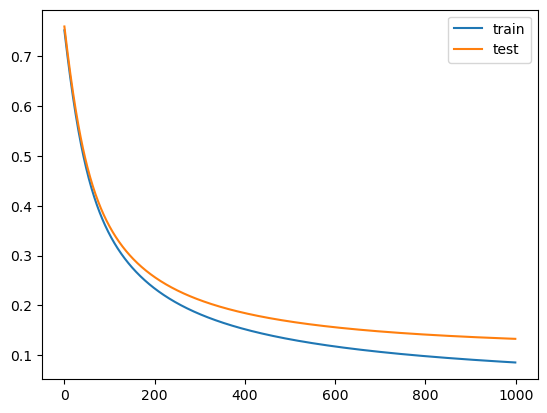

In [21]:
#plot the values stored on train_losses and test_losses
plt.plot(train_losses, label='train')
plt.plot(test_losses, label='test')
plt.legend()
plt.show()

In [30]:
#get accuracy (this is just the average of the array where )
with torch.no_grad():
    p_train = model(X_train_scaled_tensor)
    p_train = np.round(p_train)
    train_acc = np.mean(y_train_scaled_tensor.numpy() == p_train.numpy())

    p_test = model(X_test_scaled_tensor)
    p_test = np.round(p_test)
    test_acc = np.mean(y_test_scaled_tensor.numpy() == p_test.numpy())

    print("Train accuracy: {}".format(train_acc))
    print("Test accuracy: {}".format(test_acc))

Train accuracy: 0.9849246231155779
Test accuracy: 0.9649122807017544


In [31]:
# Save trained model with pytorch

# first, let's look at the model as a dictionary:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5251, -0.4578, -0.4425, -0.1991, -0.1992, -0.2882, -0.3581, -0.3223,
                       -0.3119,  0.5244, -0.2570,  0.0103, -0.1985, -0.3003, -0.1994,  0.0794,
                       -0.0107, -0.0907,  0.2670,  0.3798, -0.4288, -0.5864, -0.4391, -0.3297,
                       -0.2222, -0.2639, -0.1950, -0.4171, -0.4450, -0.1059]])),
             ('0.bias', tensor([0.4221]))])

In [38]:
# save the dictionary of the model
torch.save(model.state_dict(), 'mymodel.pt')
!ls

30471.91s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


moore.csv  mymodel.pt  tutorial1.ipynb	tutorial2.ipynb  tutorial3.ipynb


In [40]:
# to load the model, recreate the model then load the model dictionary
model2 = torch.nn.Sequential(
    torch.nn.Linear(D,1),
    torch.nn.Sigmoid()
)
#load mymodel.pt state dictionary onto model2
model2.load_state_dict(torch.load('mymodel.pt'))

<All keys matched successfully>

In [41]:
#now let's test the accuracy for model2
with torch.no_grad():
    p_train = model2(X_train_scaled_tensor)
    p_train = np.round(p_train)
    train_acc = np.mean(y_train_scaled_tensor.numpy() == p_train.numpy())

    p_test = model2(X_test_scaled_tensor)
    p_test = np.round(p_test)
    test_acc = np.mean(y_test_scaled_tensor.numpy() == p_test.numpy())

    print("Train accuracy: {}".format(train_acc))
    print("Test accuracy: {}".format(test_acc))
    

Train accuracy: 0.9849246231155779
Test accuracy: 0.9649122807017544


In [ ]:
#as seen, the result is the same